In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = pd.read_csv('data.csv',names=['X','Y'])
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [44]:
data.describe()

,X,Y
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


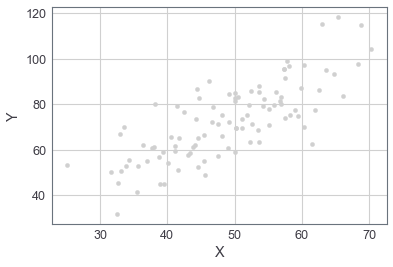

In [45]:
data.plot(kind='scatter', x='X',y='Y')

In [46]:
data.insert(0,'Ones',1)
data.head()

,Ones,X,Y
0,1,32.502345,31.707006
1,1,53.426804,68.777596
2,1,61.530358,62.562382
3,1,47.475640,71.546632
4,1,59.813208,87.230925


In [47]:
#create the training and target vars
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [48]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0]))

In [49]:
#print(theta)

In [50]:
X.shape,theta.shape,y.shape

((100, 2), (1, 2), (100, 1))

In [51]:
def computeCost (X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [52]:
computeCost(X,y,theta)

2782.553917241607

In [53]:
#print(np.sum(np.multiply(2782,X[:,0])))

In [56]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j]) #differentiating the term inside of sigma in cost function gives this
            temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term)) #from gradient descent formula
        
        theta = temp
        cost[i] = computeCost(X,y,theta)
        
    return theta,cost

In [57]:
# initialize learning parameters 
alpha = 0.0001
iters = 1000

#perform gradient descent 
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g

matrix([[ 0.05905856,  1.47833133]])

In [58]:
computeCost(X, y, g)

56.316335393554702